In [0]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchsummary import summary

import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

In [0]:
train_path = '/content/drive/My Drive/Part1/train.csv'
test_path = '/content/drive/My Drive//Part1/test.csv'
submission_path = '/content/drive/My Drive//Part1/submission.csv'
image_path = '/content/drive/My Drive/Part1/images'

train_csv = pd.read_csv(train_path, sep=',')
imdbId = train_csv['imdbId']

In [0]:
poster_data = train_csv.loc[train_csv['imdbId']==imdbId]
poster_data

,imdbId,Action,Adventure,Animation,Comedy,Drama,Horror,Romance
0,986264,0,0,0,0,1,0,0
1,1379182,0,0,0,0,1,0,0
2,361748,0,1,0,0,1,0,0
3,4175888,0,0,0,0,0,1,0
4,284445,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
10360,482603,0,1,1,1,0,0,0
10361,2818178,0,0,0,0,1,1,0
10362,275773,1,0,0,1,1,0,0
10363,266555,0,0,0,0,1,0,1


In [0]:
transform = transforms.Compose(
    [transforms.Resize((220,220)),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.ToTensor(), 
     transforms.Normalize((0.5, 0.5, 0.5 ), (0.5, 0.5, 0.5))])

In [0]:
dataset = torchvision.datasets.ImageFolder(root=r'/content/drive/My Drive/Part1',transform=transform)
dataset

Dataset ImageFolder
    Number of datapoints: 13877
    Root location: /content/drive/My Drive/Part1
    StandardTransform
Transform: Compose(
               Resize(size=(220, 220), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [0]:
image_filename = np.array(dataset.imgs)
image_filename

array([['/content/drive/My Drive/Part1/images/1000095.jpg', '1'],
       ['/content/drive/My Drive/Part1/images/1000771.jpg', '1'],
       ['/content/drive/My Drive/Part1/images/1000774.jpg', '1'],
       ...,
       ['/content/drive/My Drive/Part1/images/re_twilight.jpg', '1'],
       ['/content/drive/My Drive/Part1/images/re_us.jpg', '1'],
       ['/content/drive/My Drive/Part1/images/re_yourname.jpg', '1']],
      dtype='<U55')

In [0]:
id = 986264
whi_image = image_path + '/' + str(id) + '.jpg'
indice = [i for i, s in enumerate(image_filename) if whi_image in s]
image = dataset[indice[0]][0]
image

tensor([[[ 0.9608,  0.9686,  0.9843,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
         ...,
         [ 0.7490,  0.7333,  0.7176,  ...,  0.3804,  0.4275,  0.4510],
         [ 0.7176,  0.7098,  0.7020,  ...,  0.5059,  0.4902,  0.4667],
         [ 0.6941,  0.6863,  0.6706,  ...,  0.4588,  0.4196,  0.3804]],

        [[ 0.9765,  0.9843,  0.9843,  ...,  1.0000,  1.0000,  1.0000],
         [ 0.8980,  0.9059,  0.9216,  ...,  1.0000,  1.0000,  1.0000],
         [ 0.9059,  0.9059,  0.9294,  ...,  1.0000,  1.0000,  1.0000],
         ...,
         [ 0.2784,  0.2706,  0.2549,  ...,  0.0196,  0.0902,  0.1216],
         [ 0.2392,  0.2392,  0.2392,  ...,  0.1137,  0.1294,  0.1373],
         [ 0.2157,  0.2157,  0.2157,  ...,  0.0667,  0.0667,  0.0745]],

        [[ 0.9294,  0.9294,  0.9451,  ...,  1.0000,  1.0000,  1.0000],
         [ 0.9529,  0.9608,  0.9765,  ...,  1

In [0]:
def getimagevector(id):
    whi_image = image_path + '/' + str(id) + '.jpg'
    indice = [i for i, s in enumerate(image_filename) if whi_image in s]
    image = dataset[indice[0]][0]
    return image
image = []
for i in range(len(imdbId)):
    image.append(getimagevector(imdbId[i]))
image

[tensor([[[ 0.9608,  0.9686,  0.9843,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [ 0.7490,  0.7333,  0.7176,  ...,  0.3804,  0.4275,  0.4510],
          [ 0.7176,  0.7098,  0.7020,  ...,  0.5059,  0.4902,  0.4667],
          [ 0.6941,  0.6863,  0.6706,  ...,  0.4588,  0.4196,  0.3804]],
 
         [[ 0.9765,  0.9843,  0.9843,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.8980,  0.9059,  0.9216,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9059,  0.9059,  0.9294,  ...,  1.0000,  1.0000,  1.0000],
          ...,
          [ 0.2784,  0.2706,  0.2549,  ...,  0.0196,  0.0902,  0.1216],
          [ 0.2392,  0.2392,  0.2392,  ...,  0.1137,  0.1294,  0.1373],
          [ 0.2157,  0.2157,  0.2157,  ...,  0.0667,  0.0667,  0.0745]],
 
         [[ 0.9294,  0.9294,  0.9451,  ...,  1.0000,  1.0000,  1.0000],
          [ 0.9529,  0.9608,

In [0]:
image_array = []
for i in range(len(image)):
    image_array.append(np.array(image[i]))
#image_array

In [0]:
image_array = np.array(image_array)
#image_array

## train.csv to 80% train and 20% validation

In [0]:
import os
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder

In [0]:
class HrDataset(Dataset):
    
    def __init__(self, file_path):
        self.file_path = file_path
        self.classes = [1, 0]
        df = pd.read_csv(file_path)

        # Some preprocessing
        for col in df.columns:
            if df.dtypes[col] == "object":
                df[col] = df[col].fillna("NA")
                df[col] = df[col].astype('category')
                if len(df[col].cat.categories) > 2:
                    df = pd.get_dummies(df, columns=[col])
                else:
                    df[col] = LabelEncoder().fit_transform(df[col])
            else:
                df[col] = df[col].fillna(0)
                
        self.df = df
        self.image_array = image_array

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        y = np.array(self.df.iloc[idx, 1:]).astype(np.float32)
        X = self.image_array[idx]
        return X, y

    def __len__(self):
        return len(self.df)

In [0]:
data = HrDataset(file_path=train_path)


classes = data.classes
num_classes = len(classes)

for i in range(len(data)):
    features, label = data[i]
    print(f'Data {i}, Shape: {features.shape}, Label: {label}')
    print(features)
    if i == 1:
        break

Data 0, Shape: (3, 220, 220), Label: [0. 0. 0. 0. 1. 0. 0.]
[[[ 0.9607843   0.96862745  0.9843137  ...  1.          1.
    1.        ]
  [ 1.          1.          1.         ...  1.          1.
    1.        ]
  [ 1.          1.          1.         ...  1.          1.
    1.        ]
  ...
  [ 0.7490196   0.73333335  0.7176471  ...  0.3803922   0.427451
    0.45098042]
  [ 0.7176471   0.70980394  0.7019608  ...  0.5058824   0.4901961
    0.4666667 ]
  [ 0.69411767  0.6862745   0.67058825 ...  0.45882356  0.41960788
    0.3803922 ]]

 [[ 0.9764706   0.9843137   0.9843137  ...  1.          1.
    1.        ]
  [ 0.8980392   0.90588236  0.92156863 ...  1.          1.
    1.        ]
  [ 0.90588236  0.90588236  0.92941177 ...  1.          1.
    1.        ]
  ...
  [ 0.27843142  0.27058828  0.254902   ...  0.0196079   0.09019613
    0.12156868]
  [ 0.23921573  0.23921573  0.23921573 ...  0.11372554  0.12941182
    0.13725495]
  [ 0.21568632  0.21568632  0.21568632 ...  0.06666672  0.066666

In [0]:
from torch.utils.data import random_split

##Using Train.csv
full_data = HrDataset(train_path)

train_size = int(0.8 * len(full_data))
valid_size = len(full_data) - train_size

train, valid = random_split(full_data, [train_size, valid_size])

##Using Test.csv
test = HrDataset(test_path)
submit = HrDataset(submission_path)

print(f'Full(Train+Valid):\t{len(full_data)}')
print(f'|Train:\t\t\t{len(train)}')
print(f'|Validation:\t\t{len(valid)}')
print(f'|Test:\t\t\t{len(test)}')
print(f'|Submit:\t\t{len(submit)}')

Full(Train+Valid):	10365
|Train:			8292
|Validation:		2073
|Test:			2000
|Submit:		591


In [0]:
full_data

In [0]:
batch_size = 32

train_loader = DataLoader(train, batch_size=batch_size,
                          shuffle=True, num_workers=16, pin_memory=True)

valid_loader = DataLoader(valid, batch_size=batch_size,
                          shuffle=True, num_workers=16, pin_memory=True)

test_loader = DataLoader(test, batch_size=batch_size,
                         shuffle=True, num_workers=16, pin_memory=True)

submit_loader = DataLoader(submit, batch_size=batch_size,
                         shuffle=True, num_workers=16, pin_memory=True)

dataiter = iter(train_loader)
inputs, labels = dataiter.next()

print(f'Feature Size: {inputs.size()}')
print(f'Label Size: {labels.size()}')
print(f'Batched features:\n {inputs}, \
      \n Batched labels:\n {labels}')

Feature Size: torch.Size([32, 3, 220, 220])
Label Size: torch.Size([32, 7])
Batched features:
 tensor([[[[ 0.6863,  0.6941,  0.7176,  ...,  0.3333,  0.3333,  0.3333],
          [ 0.6706,  0.6784,  0.6941,  ...,  0.3333,  0.3333,  0.3333],
          [ 0.6863,  0.6863,  0.6941,  ...,  0.3412,  0.3412,  0.3412],
          ...,
          [-0.9765, -0.9765, -0.9765,  ..., -0.9765, -0.9765, -0.9765],
          [-0.9686, -0.9686, -0.9686,  ..., -0.9765, -0.9765, -0.9765],
          [-0.9765, -0.9765, -0.9765,  ..., -0.9608, -0.9608, -0.9608]],

         [[ 0.7569,  0.7647,  0.7882,  ...,  0.4824,  0.4824,  0.4824],
          [ 0.7412,  0.7490,  0.7647,  ...,  0.4824,  0.4824,  0.4824],
          [ 0.7647,  0.7647,  0.7647,  ...,  0.4902,  0.4902,  0.4902],
          ...,
          [-0.7725, -0.7725, -0.7725,  ..., -0.8510, -0.8510, -0.8510],
          [-0.7804, -0.7804, -0.7804,  ..., -0.8510, -0.8510, -0.8510],
          [-0.7882, -0.7882, -0.7882,  ..., -0.8588, -0.8588, -0.8588]],

       

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
# from torch.utils.tensorboard import SummaryWriter

In [0]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)  
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)   
        self.fc1 = nn.Linear(32 * 24 * 24, 50)
        self.fc2 = nn.Linear(50, 20)
        self.fc3 = nn.Linear(20, 7)

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x))) 
        x = self.pool1(F.relu(self.conv2(x)))
        x = self.pool2(F.relu(self.conv3(x)))
        x = x.view(-1, 32 * 24 * 24)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


## gpu or cpu
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net = Net().to(device)

In [0]:
model = net
model.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=18432, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=20, bias=True)
  (fc3): Linear(in_features=20, out_features=7, bias=True)
)

In [0]:
summary(model, (3, 220, 220))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 6, 216, 216]             456
         MaxPool2d-2          [-1, 6, 108, 108]               0
            Conv2d-3         [-1, 16, 104, 104]           2,416
         MaxPool2d-4           [-1, 16, 52, 52]               0
            Conv2d-5           [-1, 32, 48, 48]          12,832
         MaxPool2d-6           [-1, 32, 24, 24]               0
            Linear-7                   [-1, 50]         921,650
            Linear-8                   [-1, 20]           1,020
            Linear-9                    [-1, 7]             147
Total params: 938,521
Trainable params: 938,521
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.55
Forward/backward pass size (MB): 5.02
Params size (MB): 3.58
Estimated Total Size (MB): 9.16
-------------------------------------------

In [0]:
print(device)

cuda:0


In [0]:
import matplotlib.pyplot as plt
trainLoss = []
validLoss = []
trainAccu = []

In [0]:
def save_checkpoint(save_path, model, optimizer, val_loss):
    if save_path==None:
        return
    save_path = save_path 
    state_dict = {'model_state_dict': model.state_dict(),
                  'optimizer_state_dict': optimizer.state_dict(),
                  'val_loss': val_loss}

    torch.save(state_dict, save_path)

    print(f'Model saved to ==> {save_path}')

def load_checkpoint(model, optimizer):
    save_path = f'cifar_net.pt'
    state_dict = torch.load(save_path)
    model.load_state_dict(state_dict['model_state_dict'])
    optimizer.load_state_dict(state_dict['optimizer_state_dict'])
    val_loss = state_dict['val_loss']
    print(f'Model loaded from <== {save_path}')
    
    return val_loss



def TRAIN(net, train_loader, valid_loader,  num_epochs, eval_every, total_step, criterion, optimizer, val_loss, device, save_name):
    
    running_loss = 0.0
    running_corrects = 0
    running_num = 0
    global_step = 0
    if val_loss==None:
        best_val_loss = float("Inf")  
    else: 
        best_val_loss=val_loss
    

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        for i, (inputs, labels) in enumerate(train_loader):
            net.train()
            inputs = inputs.to(device)
            labels = labels.to(device)

            '''Training of the model'''
            # Forward pass
            outputs = net(inputs)
            
            # print("outputs.size()" + str(outputs.size()))

            preds = (outputs.data >= 0)
            # print(preds)
            # print("preds.size()" + str(preds.size()))

            labels = labels.float()
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            global_step += 1

            running_loss += loss.item()
            running_corrects += torch.sum(preds == labels.data)
            running_num += len(labels)

            '''Evaluating the model every x steps'''
            if global_step % eval_every == 0:
                with torch.no_grad():
                    net.eval()
                    val_running_loss = 0.0
                    val_running_corrects = 0
                    for val_inputs, val_labels in valid_loader:
                        val_inputs = val_inputs.to(device)
                        val_labels = val_labels.to(device)
                        val_outputs = net(val_inputs)
                        val_loss = criterion(val_outputs, val_labels)
                        preds = (val_outputs.data >= 0)
                        val_running_loss += val_loss.item()
                        val_running_corrects += torch.sum(preds == val_labels.data)


                    average_train_loss = running_loss / (eval_every)
                    average_val_loss = val_running_loss / len(valid_loader)
                    average_train_acc = running_corrects / float(7*running_num)

                    trainLoss.append(average_train_loss)
                    validLoss.append(average_val_loss)
                    trainAccu.append(average_train_acc)

                    print('Epoch [{}/{}], Step [{}/{}], Train Loss: {:.2f}, Train Acc: {:.2f}, Valid Loss: {:.2f}'
                          .format(epoch+1, num_epochs, global_step, total_step, average_train_loss,
                                  average_train_acc, average_val_loss))

                    running_loss = 0.0
                    running_num = 0
                    running_corrects = 0
                    
                    if average_val_loss < best_val_loss:
                        best_val_loss = average_val_loss
                        save_checkpoint(save_name, net, optimizer, best_val_loss)
   
                    # graph.add_scalar('111111_train_loss____', average_train_loss, epoch)
                    # graph.add_scalar('222222_valid_loss____', average_val_loss, epoch)
                    # graph.add_scalar('333333_train_accu____', average_train_acc, epoch)               

    print('Finished Training')

In [0]:
num_epochs = 10
eval_every = 100
total_step = len(train_loader)*num_epochs
best_val_loss = None
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
save_path = f'cifar_net.pt'
model = model.to(device)

TRAIN(model , train_loader, valid_loader, num_epochs, eval_every, total_step, criterion, optimizer, best_val_loss, device, save_path)

Epoch [1/10], Step [100/2600], Train Loss: 0.49, Train Acc: 0.77, Valid Loss: 0.48
Model saved to ==> cifar_net.pt
Epoch [1/10], Step [200/2600], Train Loss: 0.47, Train Acc: 0.79, Valid Loss: 0.47
Model saved to ==> cifar_net.pt
Epoch [2/10], Step [300/2600], Train Loss: 0.47, Train Acc: 0.78, Valid Loss: 0.47
Model saved to ==> cifar_net.pt
Epoch [2/10], Step [400/2600], Train Loss: 0.46, Train Acc: 0.79, Valid Loss: 0.46
Model saved to ==> cifar_net.pt
Epoch [2/10], Step [500/2600], Train Loss: 0.46, Train Acc: 0.78, Valid Loss: 0.47
Epoch [3/10], Step [600/2600], Train Loss: 0.45, Train Acc: 0.79, Valid Loss: 0.47
Epoch [3/10], Step [700/2600], Train Loss: 0.45, Train Acc: 0.79, Valid Loss: 0.46
Model saved to ==> cifar_net.pt
Epoch [4/10], Step [800/2600], Train Loss: 0.44, Train Acc: 0.80, Valid Loss: 0.46
Model saved to ==> cifar_net.pt
Epoch [4/10], Step [900/2600], Train Loss: 0.43, Train Acc: 0.80, Valid Loss: 0.46
Epoch [4/10], Step [1000/2600], Train Loss: 0.44, Train Acc: 

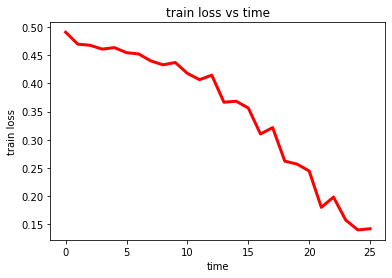

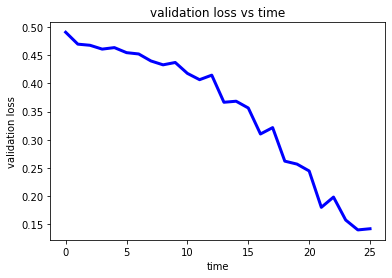

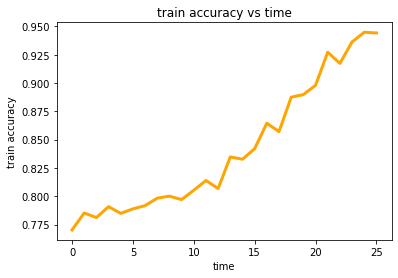

In [0]:
time1 = []
a = len(trainLoss)
for i in range(0, a):
  time1.append(i)
plt.plot(time1, trainLoss,  color='red', linewidth=3)
plt.axis
plt.title('train loss vs time')
plt.xlabel('time')
plt.ylabel('train loss')
plt.show()

time2 = []
b = len(validLoss)
for i in range(0, b):
  time2.append(i)
plt.plot(time2, trainLoss,  color='blue', linewidth=3)
plt.axis
plt.title('validation loss vs time')
plt.xlabel('time')
plt.ylabel('validation loss')
plt.show()

time3 = []
c = len(trainAccu)
for i in range(0, c):
  time3.append(i)
plt.plot(time3, trainAccu,  color='orange', linewidth=3)
plt.axis
plt.title('train accuracy vs time')
plt.xlabel('time')
plt.ylabel('train accuracy')
plt.show()

In [0]:
from sklearn.metrics import classification_report

def eval(model, test_loader, threshold):
    y_test = []
    y_pred = []
    genre = ["Action", "Adventure", "Animation", "Comedy", "Drama", "Horror", "Romance"]
    with torch.no_grad():
        for inputs, labels in test_loader:
          inputs = inputs.to(device)
          labels = labels.to(device)
          model.eval()
          outputs = model(inputs)
          predicted = (outputs.data >= threshold)
          y_pred.extend(predicted.cpu().numpy())
          y_test.extend(labels.cpu().numpy())

    print("threshold : "+str(threshold))
    print(classification_report(y_test, y_pred, target_names=genre))
threshold = [-1, -0.8, -0.4, 0, 0.4]
for i in threshold:
  eval(model, test_loader, i)

threshold : -1
              precision    recall  f1-score   support

      Action       0.20      0.22      0.21       413
   Adventure       0.11      0.13      0.12       254
   Animation       0.08      0.08      0.08       148
      Comedy       0.38      0.40      0.39       774
       Drama       0.57      0.67      0.62      1151
      Horror       0.12      0.16      0.14       259
     Romance       0.22      0.30      0.26       418

   micro avg       0.35      0.41      0.37      3417
   macro avg       0.24      0.28      0.26      3417
weighted avg       0.35      0.41      0.38      3417
 samples avg       0.37      0.42      0.37      3417



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


threshold : -0.8
              precision    recall  f1-score   support

      Action       0.19      0.20      0.20       413
   Adventure       0.11      0.12      0.11       254
   Animation       0.09      0.08      0.08       148
      Comedy       0.38      0.38      0.38       774
       Drama       0.57      0.65      0.61      1151
      Horror       0.12      0.15      0.14       259
     Romance       0.22      0.29      0.25       418

   micro avg       0.35      0.39      0.37      3417
   macro avg       0.24      0.27      0.25      3417
weighted avg       0.35      0.39      0.37      3417
 samples avg       0.37      0.41      0.36      3417

threshold : -0.4
              precision    recall  f1-score   support

      Action       0.20      0.19      0.20       413
   Adventure       0.12      0.12      0.12       254
   Animation       0.09      0.08      0.09       148
      Comedy       0.38      0.36      0.37       774
       Drama       0.57      0.62      0.60 

In [0]:
y_pred = []
with torch.no_grad():
    for inputs, labels in submit_loader:
          inputs = inputs.to(device)
          model.eval()
          outputs = model(inputs)
          predicted = (outputs.data >= -0.4)
          y_pred.extend(predicted.int().cpu().numpy())

[array([0, 0, 0, 1, 0, 0, 0], dtype=int32),
 array([0, 0, 0, 1, 1, 0, 0], dtype=int32),
 array([0, 0, 0, 0, 1, 0, 1], dtype=int32),
 array([0, 0, 0, 1, 1, 0, 0], dtype=int32),
 array([1, 0, 0, 0, 0, 0, 0], dtype=int32),
 array([0, 0, 0, 1, 1, 0, 0], dtype=int32),
 array([0, 0, 0, 1, 0, 0, 0], dtype=int32),
 array([1, 0, 0, 0, 1, 0, 0], dtype=int32),
 array([0, 0, 0, 0, 1, 0, 0], dtype=int32),
 array([0, 0, 0, 0, 1, 0, 1], dtype=int32),
 array([0, 0, 0, 1, 0, 0, 1], dtype=int32),
 array([0, 0, 0, 0, 1, 0, 1], dtype=int32),
 array([0, 0, 0, 1, 1, 0, 1], dtype=int32),
 array([0, 0, 0, 0, 1, 1, 0], dtype=int32),
 array([0, 0, 0, 1, 1, 0, 1], dtype=int32),
 array([0, 0, 0, 0, 1, 0, 0], dtype=int32),
 array([0, 0, 0, 0, 0, 1, 0], dtype=int32),
 array([0, 0, 0, 1, 1, 0, 1], dtype=int32),
 array([0, 0, 0, 1, 1, 0, 0], dtype=int32),
 array([1, 0, 0, 0, 1, 0, 0], dtype=int32),
 array([0, 0, 0, 1, 1, 0, 0], dtype=int32),
 array([0, 0, 0, 1, 1, 0, 0], dtype=int32),
 array([1, 0, 0, 0, 1, 0, 0], dt

In [0]:
y_pred = np.array(y_pred)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int32)

In [0]:
dataset = pd.DataFrame({'Action': y_pred[:, 0], 'Adventure': y_pred[:, 1],'Animation': y_pred[:, 2], 'Comedy': y_pred[:, 3],'Drama': y_pred[:, 4], 'Horror': y_pred[:, 5],'Romance': y_pred[:, 6]})
dataset

,Action,Adventure,Animation,Comedy,Drama,Horror,Romance
0,0,0,0,1,0,0,0
1,0,0,0,1,1,0,0
2,0,0,0,0,1,0,1
3,0,0,0,1,1,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
586,0,0,0,1,1,0,1
587,0,0,0,0,1,0,1
588,0,1,0,0,1,0,0
589,0,0,0,1,1,0,1


In [0]:
sub_csv = pd.read_csv(submission_path)
ID = sub_csv.imdbId
ID

0      2960930
1      1295071
2       239441
3       305396
4      1413489
        ...   
586    3704050
587     477253
588     371606
589     392364
590    1794725
Name: imdbId, Length: 591, dtype: int64

In [0]:
df = pd.concat([ID, dataset], axis=1)
df = df.to_numpy()

In [0]:
import csv
fields = ['imdbId', 'Action', 'Adventure', 'Animation', 'Comedy', 'Drama', 'Horror', 'Romance']

with open('/content/drive/My Drive/Part1/submit.csv', 'w') as csvfile:   
    csvwriter = csv.writer(csvfile)  
    csvwriter.writerow(fields)
    csvwriter.writerows(df)    

csvfile.close()